# Employee Payroll Risk Analysis



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
df = pd.read_csv("payroll_risk_data.csv")
df.head()

,employee_id,avg_monthly_attendance,late_marks_count,leave_days_last_6m,salary_change_pct,bonus_paid_last_year,high_risk
0,E001,92,2,3,5,1,0
1,E002,78,8,10,-5,0,1
2,E003,85,5,6,2,1,0
3,E004,60,15,20,-12,0,1
4,E005,95,1,2,6,1,0


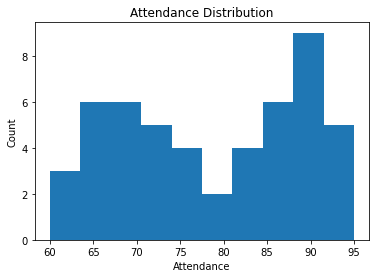

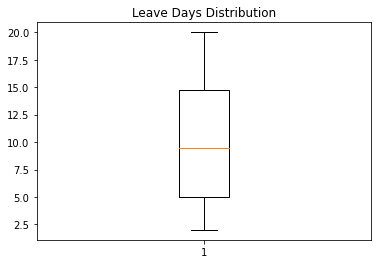

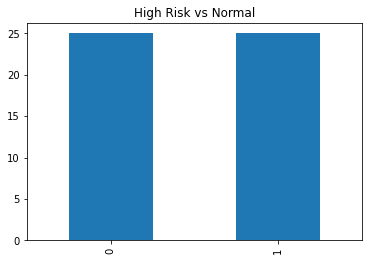

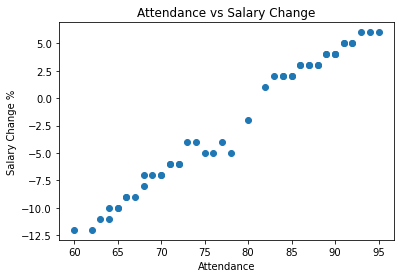

In [11]:
# Histogram
plt.hist(df["avg_monthly_attendance"])
plt.title("Attendance Distribution")
plt.xlabel("Attendance")
plt.ylabel("Count")
plt.show()

# Box plot
plt.boxplot(df["leave_days_last_6m"])
plt.title("Leave Days Distribution")
plt.show()

# Bar chart
df["high_risk"].value_counts().plot(kind="bar")
plt.title("High Risk vs Normal")
plt.show()

# Scatter plot
plt.scatter(df["avg_monthly_attendance"], df["salary_change_pct"])
plt.xlabel("Attendance")
plt.ylabel("Salary Change %")
plt.title("Attendance vs Salary Change")
plt.show()


In [15]:
X = df.drop(["employee_id", "high_risk"], axis=1)
y = df["high_risk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results.append([
        name,
        accuracy_score(y_test, preds),
        precision_score(y_test, preds),
        recall_score(y_test, preds),
        f1_score(y_test, preds)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1"]
)

results_df


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Decision Tree,1.0,1.0,1.0,1.0
2,Random Forest,1.0,1.0,1.0,1.0


In [16]:
rf = models["Random Forest"]
importance = rf.feature_importances_

pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)


,Feature,Importance
2,leave_days_last_6m,0.24
3,salary_change_pct,0.24
4,bonus_paid_last_year,0.19
0,avg_monthly_attendance,0.17
1,late_marks_count,0.16
